### Needed imports and bibliotecs not in kernel

In [1]:
import time

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from concrete.ml.sklearn import LinearRegression as ConcreteLinearRegression

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display

### Classic linear regression from sklearn


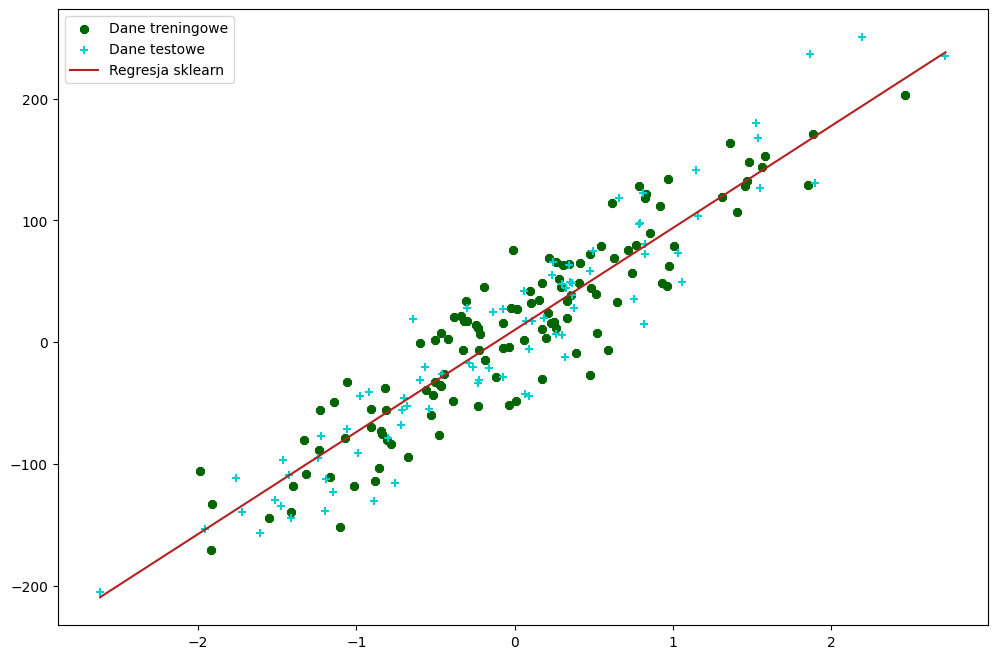

In [2]:
X, y = make_regression(
    n_samples=200, n_features=1, n_targets=1, bias=5.0, noise=30.0, random_state=42
)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=42)

buffor_1 = np.argsort(np.squeeze(train_x))
buffor_2 = np.argsort(np.squeeze(test_x))

train_x = train_x[buffor_1, :]
train_y = train_y[buffor_1]
test_x = test_x[buffor_2, :]
test_y = test_y[buffor_2]

linear_regression = SklearnLinearRegression()
linear_regression.fit(train_x, train_y)
predicted = linear_regression.predict(test_x)

plt.ioff()

plt.clf()
fig, ax = plt.subplots(1, figsize=(12, 8))
fig.patch.set_facecolor("white")
ax.scatter(train_x, train_y, c="darkgreen", marker="8", label="Dane treningowe")
ax.scatter(test_x, test_y, c="darkturquoise", marker="+", label="Dane testowe")
ax.plot(test_x, predicted, c="firebrick", marker=None, label="Regresja sklearn")
ax.legend()
display(fig)

### Quantizated data



In [3]:
quantizated_linear_regression = ConcreteLinearRegression(
    n_bits={"net_inputs": 6, "op_inputs": 6, "op_weights": 1, "net_outputs": 6}
)
quantizated_linear_regression.fit(train_x, train_y)
predicted_quantizated = quantizated_linear_regression.predict(test_x)

### Quantizated + FHE


In [7]:
circuit = quantizated_linear_regression.compile(X)
print("generowanie klucza dlugosci " + str(circuit.graph.maximum_integer_bit_width()) + " bitow")
time_begin = time.time()
circuit.client.keygen(force=False)

print("czas twaania: "+  str(time.time() - time_begin) + " sekund")

time_begin = time.time()
test_predicted_fhe = quantizated_linear_regression.predict(test_x, execute_in_fhe=True)

generowanie klucza dlugosci 7 bitow
czas twaania: 1085.313357591629 sekund



### PODSUMOWANIE

In [8]:
sklearn_r2 = r2_score(predicted, test_y)
quntizated = r2_score(predicted_quantizated, test_y)
quantizated_fhe = r2_score(test_predicted_fhe, test_y)

print("Sklearn R^2: " + str(sklearn_r2))
print("Dane po kwantyzacji R^2: " + str(quntizated))
print("Dane po kwantyzacji i z szyfrowaniem homomorficznym  R^2: " + str(quantizated_fhe))

Sklearn R^2: 0.8758079011668389
Dane po kwantyzacji R^2: 0.862695164659212
Dane po kwantyzacji i z szyfrowaniem homomorficznym  R^2: 0.862695164659212


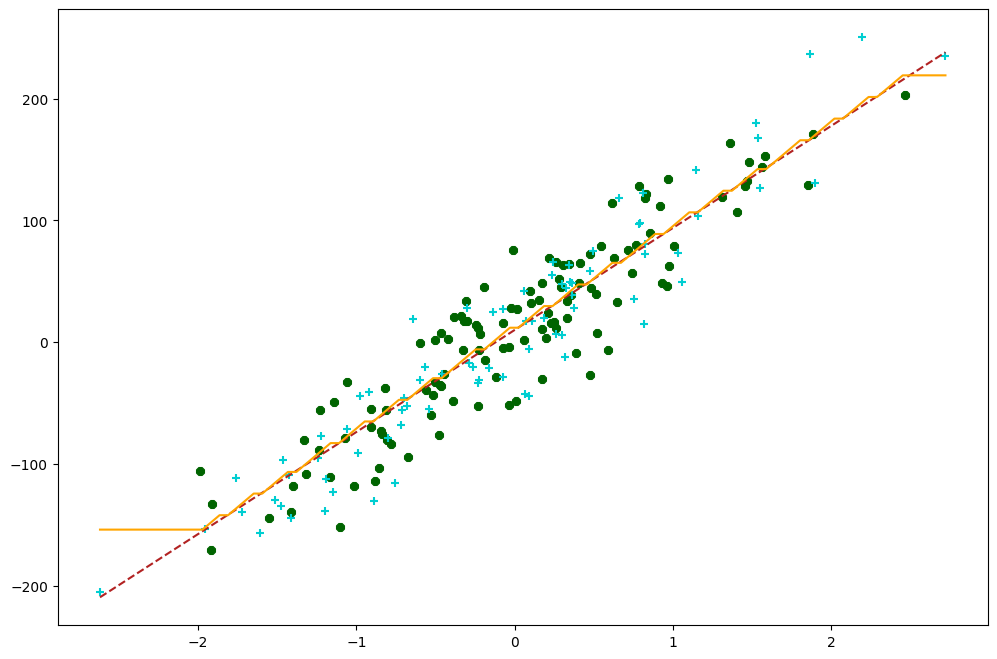

In [10]:
x_space = np.linspace(test_x.min(), test_x.max(), 100)
x_space = x_space[:, np.newaxis]

fianl_result = quantizated_linear_regression.predict(x_space, execute_in_fhe=True)

plt.clf()
fig, ax = plt.subplots(1, figsize=(12, 8))
fig.patch.set_facecolor("white")
s1 = ax.scatter(train_x, train_y, c="darkgreen", marker="8", label="Dane treningowe")
s2 = ax.scatter(test_x, test_y, c="darkturquoise", marker="+", label="Dane testowe")
p1 = ax.plot(test_x, predicted, c="firebrick", marker=None, linestyle="dashed",label="Regresja sklearn")
p2 = ax.plot(x_space, fianl_result, c="orange", marker=None, label="Regresja FHE")

display(fig)